# Import Libraries

In [1]:
import torch
from kan import KAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Data Preparation

In [2]:
df = pd.read_csv(r"./Debernardi et al 2020 data.csv")

In [3]:
df

sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0          S1        Cohort1          BPTB   33   F          1   NaN   
1         S10        Cohort1          BPTB   81   F          1   NaN   
2        S100        Cohort2          BPTB   51   M          1   NaN   
3        S101        Cohort2          BPTB   61   M          1   NaN   
4        S102        Cohort2          BPTB   62   M          1   NaN   
..        ...            ...           ...  ...  ..        ...   ...   
585      S549        Cohort2          BPTB   68   M          3    IV   
586      S558        Cohort2          BPTB   71   F          3    IV   
587      S560        Cohort2          BPTB   63   M          3    IV   
588      S583        Cohort2          BPTB   75   F          3    IV   
589      S590        Cohort1          BPTB   74   M          3    IV   

    benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1       REG1B  \
0                       NaN           11.7     1.83222  0.893219   52.948840   
1                       NaN            NaN     0.97266  2.037585   94.467030   
2                       NaN            7.0     0.78039  0.145589  102.366000   
3                       NaN            8.0     0.70122  0.002805   60.579000   
4                       NaN            9.0     0.21489  0.000860   65.540000   
..                      ...            ...         ...       ...         ...   
585                     NaN            NaN     0.52026  7.058209  156.241000   
586                     NaN            NaN     0.85956  8.341207   16.915000   
587                     NaN            NaN     1.36851  7.674707  289.701000   
588                     NaN            NaN     1.33458  8.206777  205.930000   
589                     NaN         1488.0     1.50423  8.200958  411.938275   

            TFF1      REG1A  
0     654.282174   1262.000  
1     209.488250    228.407  
2     461.141000        NaN  
3     142.950000        NaN  
4      41.088000        NaN  
..           ...        ...  
585   525.178000        NaN  
586   245.947000        NaN  
587   537.286000        NaN  
588   722.523000        NaN  
589  2021.321078  13200.000  

[590 rows x 14 columns]

In [4]:
#pip install interpret


For feature selection we used Explainable Boosting Machine (EBM)

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())


df.columns = [
    "sample_id","patient_cohort","sample_origin","age","sex","diagnosis","stage","benign_sample_diagnosis","plasma_CA19_9","creatinine","LYVE1","REG1B","TFF1","REG1A"

]
z = df
#y = (df.iloc[:, -1] == " >50K").astype(int)
z1 = df['diagnosis']
seed = 42
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(z, z1, test_size=0.20, random_state=seed)

In [6]:
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

c:\Users\arunm\.conda\envs\arun\lib\site-packages\interpret\glassbox\_ebm\_ebm.py:740: UserWarning: Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]
  warn(
c:\Users\arunm\.conda\envs\arun\lib\site-packages\interpret\glassbox\_ebm\_ebm.py:999: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.
  warn(


ExplainableBoostingClassifier()

In [7]:
from interpret import show
show(ebm.explain_global())

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your DataFrame (replace with your actual data loading code)
# df = pd.read_csv('your_dataset.csv')

# Feature selection
df_features = df.drop(columns=[ "sample_id", "patient_cohort", "sample_origin",
                               "stage", "benign_sample_diagnosis", "age"])
df_features['sex'] = df_features['sex'].replace({'F': 0, 'M': 1})

# Handle missing values (replace NaN with mean)
df_features.fillna(df_features.mean(), inplace=True)


In [68]:
df_features

sex  diagnosis  plasma_CA19_9  creatinine     LYVE1       REG1B  \
0      0          0      11.700000     1.83222  0.893219   52.948840   
1      0          0     654.002944     0.97266  2.037585   94.467030   
2      1          0       7.000000     0.78039  0.145589  102.366000   
3      1          0       8.000000     0.70122  0.002805   60.579000   
4      1          0       9.000000     0.21489  0.000860   65.540000   
..   ...        ...            ...         ...       ...         ...   
585    1          1     654.002944     0.52026  7.058209  156.241000   
586    0          1     654.002944     0.85956  8.341207   16.915000   
587    1          1     654.002944     1.36851  7.674707  289.701000   
588    0          1     654.002944     1.33458  8.206777  205.930000   
589    1          1    1488.000000     1.50423  8.200958  411.938275   

            TFF1         REG1A  
0     654.282174   1262.000000  
1     209.488250    228.407000  
2     461.141000    735.281222  
3     142.950000    735.281222  
4      41.088000    735.281222  
..           ...           ...  
585   525.178000    735.281222  
586   245.947000    735.281222  
587   537.286000    735.281222  
588   722.523000    735.281222  
589  2021.321078  13200.000000  

[590 rows x 8 columns]

Apart from target, remaining columns will be features

In [10]:
"""import pandas as pd

# Feature selection 
df_features = df.drop(columns=["diagnosis","sample_id", "patient_cohort", "sample_origin",
                               "stage", "benign_sample_diagnosis","age"])

# Handle missing values (replace NaN with 0)
# temp cleaning method
df_features.fillna(0, inplace=True)
#df_features.fillna(df_features.mean(), inplace=True)
#df_features.fillna(df_features.median(), inplace=True)
# Convert sex to numerical representation
df_features['sex'] = df_features['sex'].replace({'F': 0, 'M': 1})

# Label transformation (convert diagnosis labels 1, 2, 3 to 0, 1, 2)
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x > 1 else 0)

# Separate features and target variables
X = df_features
y = df['diagnosis']

print(X)
print(y)
"""


# Scale features
scaler = StandardScaler()
df_features[df_features.columns] = scaler.fit_transform(df_features[df_features.columns])

# Convert diagnosis to binary (0 and 1)
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x > 1 else 0)

# Separate features and target variables
X = df_features
y = df['diagnosis']

# Print the processed data for verification
print("Processed Features (X):\n", X.head())
print("Processed Target (y):\n", y.head())

# Check for any remaining missing values
print("\nRemaining missing values in X:\n", X.isnull().sum())
print("Remaining missing values in y:\n", y.isnull().sum())


Processed Features (X):
         sex  plasma_CA19_9  creatinine     LYVE1     REG1B      TFF1  \
0 -0.986531  -3.436293e-01    1.529927 -0.631661 -0.299975  0.055876   
1 -0.986531  -6.082196e-17    0.183680 -0.298597 -0.088256 -0.384680   
2  1.013653  -3.461438e-01   -0.117454 -0.849256 -0.047976 -0.135425   
3  1.013653  -3.456088e-01   -0.241451 -0.890812 -0.261065 -0.450584   
4  1.013653  -3.450738e-01   -1.003143 -0.891378 -0.235767 -0.551475   

          REG1A  
0  4.959085e-01  
1 -4.772248e-01  
2 -1.070368e-16  
3 -1.070368e-16  
4 -1.070368e-16  
Processed Target (y):
 0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

Remaining missing values in X:
 sex              0
plasma_CA19_9    0
creatinine       0
LYVE1            0
REG1B            0
TFF1             0
REG1A            0
dtype: int64
Remaining missing values in y:
 0


In [11]:
X

sex  plasma_CA19_9  creatinine     LYVE1     REG1B      TFF1  \
0   -0.986531  -3.436293e-01    1.529927 -0.631661 -0.299975  0.055876   
1   -0.986531  -6.082196e-17    0.183680 -0.298597 -0.088256 -0.384680   
2    1.013653  -3.461438e-01   -0.117454 -0.849256 -0.047976 -0.135425   
3    1.013653  -3.456088e-01   -0.241451 -0.890812 -0.261065 -0.450584   
4    1.013653  -3.450738e-01   -1.003143 -0.891378 -0.235767 -0.551475   
..        ...            ...         ...       ...       ...       ...   
585  1.013653  -6.082196e-17   -0.524871  1.162636  0.226755 -0.071998   
586 -0.986531  -6.082196e-17    0.006542  1.536048 -0.483726 -0.348568   
587  1.013653  -6.082196e-17    0.803662  1.342066  0.907324 -0.060005   
588 -0.986531  -6.082196e-17    0.750521  1.496923  0.480141  0.123466   
589  1.013653   4.461848e-01    1.016227  1.495229  1.530663  1.409888   

            REG1A  
0    4.959085e-01  
1   -4.772248e-01  
2   -1.070368e-16  
3   -1.070368e-16  
4   -1.070368e-16  
..            ...  
585 -1.070368e-16  
586 -1.070368e-16  
587 -1.070368e-16  
588 -1.070368e-16  
589  1.173560e+01  

[590 rows x 7 columns]

Lets split data into train val and test and then convert them to Torch tensors

In [12]:
# Splitting data to train val test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=5)

# Converting data to Torch tensor
train_input = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
train_label = torch.tensor(y_train.to_numpy(), dtype=torch.long)
val_input = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
val_label = torch.tensor(y_val.to_numpy(), dtype=torch.long)
test_input = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
test_label = torch.tensor(y_test.to_numpy(), dtype=torch.long)


In [66]:
X_test

sex  plasma_CA19_9  creatinine     LYVE1     REG1B      TFF1  \
360  1.013653  -3.326084e-01   -0.613440  0.280443 -0.396328 -0.286411   
111  1.013653  -3.463685e-01   -0.790578 -0.891220 -0.558810 -0.559294   
45  -0.986531  -6.082196e-17   -0.383161 -0.859523 -0.486183 -0.419312   
359  1.013653  -3.456623e-01    0.236821 -0.435789  0.084171 -0.256393   
230  1.013653  -6.082196e-17    2.982456  0.820742  0.455077  0.931849   
299 -0.986531  -3.391888e-01   -1.073998 -0.359163 -0.536398  0.209750   
493  1.013653  -7.757594e-02   -0.489444  2.124917 -0.240527 -0.233174   
379 -0.986531  -3.466788e-01   -0.808292 -0.566843 -0.458959 -0.518021   
250  1.013653  -6.082196e-17   -0.082027  0.666506 -0.460912 -0.172878   
357  1.013653  -6.082196e-17   -0.808292 -0.527652 -0.553186 -0.544137   
417 -0.986531  -1.845751e-01   -0.418588 -0.532535  0.166757  1.193662   
555  1.013653  -3.193940e-01   -0.790578  0.235472  0.848014 -0.592145   
195 -0.986531  -3.450738e-01    0.183680  0.176318 -0.337358 -0.414478   
134  1.013653  -3.458388e-01    0.856803 -0.474063 -0.041440  0.245195   
283  1.013653  -3.038791e-01    1.600782  0.628871 -0.323433  0.598543   
423 -0.986531  -1.605003e-01   -1.091712 -0.821134 -0.391598 -0.574491   
482 -0.986531  -3.279539e-01   -0.967715  0.404152 -0.501628 -0.583829   
222 -0.986531  -3.472138e-01   -0.631154 -0.553592 -0.517612 -0.512166   

            REG1A  
360  3.645393e-02  
111 -6.922711e-01  
45  -5.951229e-01  
359  3.272408e+00  
230 -1.070368e-16  
299 -1.070368e-16  
493 -4.974812e-01  
379 -1.070368e-16  
250 -1.070368e-16  
357 -1.070368e-16  
417 -3.306522e-01  
555  4.015255e+00  
195 -1.070368e-16  
134 -4.302615e-01  
283 -5.721709e-01  
423  1.650194e+00  
482 -3.980799e-02  
222 -1.070368e-16

In [13]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'val_input': val_input,
    'val_label': val_label,
    'test_input': test_input,
    'test_label': test_label
}

KAN-MODEL


In [14]:
# Create model
#model = KAN(width=[7,32,64,2], grid=10, k=3)
model = KAN(width=[7,64,128,64,2], grid=4, k=2)
#model = KAN(width=[7,8,32,8,2], grid=1, k=2)
#model = KAN(width=[6,64,128,64,6], grid=10, k=3)

checkpoint directory created: ./model
saving model version 0.0


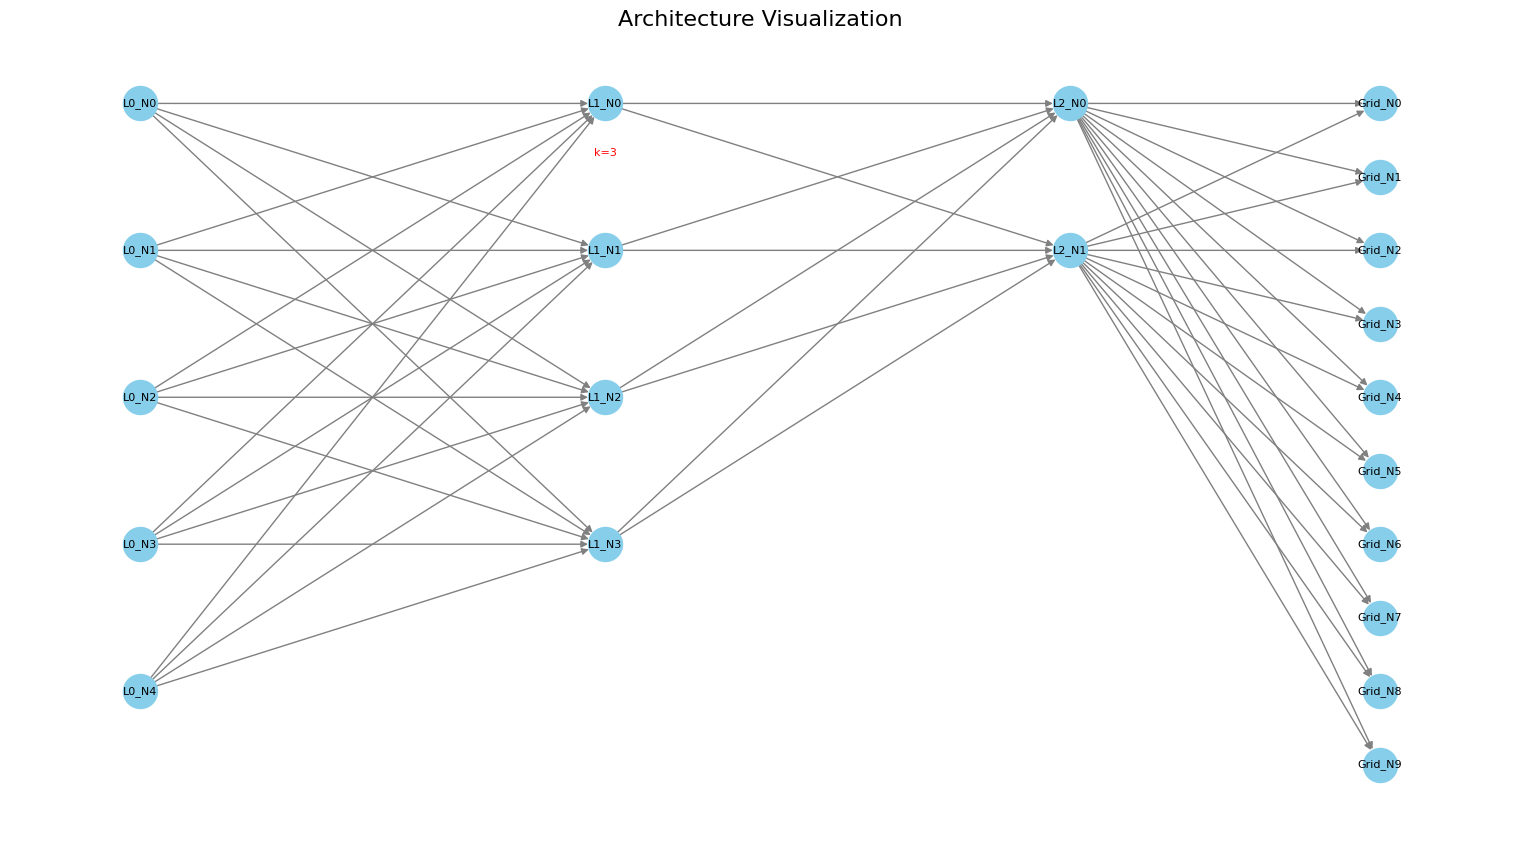

In [62]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_general_architecture(layers, k_neighbors, grid_size):
    """
    Plots a generalized architecture diagram similar to the provided image.
    Args:
        layers (list): Number of nodes in each layer.
        k_neighbors (int): Number of nearest connections (k).
        grid_size (int): Grid size for the expanded representation.
    """
    G = nx.DiGraph()
    pos = {}
    annotations = {}

    # Set layer-wise positions and connections
    layer_gap = 3
    node_gap = 1.5

    for layer_idx, num_nodes in enumerate(layers):
        for node_idx in range(num_nodes):
            node_name = f"L{layer_idx}_N{node_idx}"
            pos[node_name] = (layer_idx * layer_gap, -node_idx * node_gap)
            G.add_node(node_name)

            # Connect to previous layer nodes
            if layer_idx > 0:
                for prev_node_idx in range(layers[layer_idx - 1]):
                    prev_node_name = f"L{layer_idx - 1}_N{prev_node_idx}"
                    G.add_edge(prev_node_name, node_name)

                # Add annotations for k-nearest
                if layer_idx == 1 and node_idx == 0:
                    annotations[node_name] = f"k={k_neighbors}"

    # Expand grid representation at last layer
    for grid_idx in range(grid_size):
        grid_node_name = f"Grid_N{grid_idx}"
        G.add_node(grid_node_name)
        pos[grid_node_name] = ((len(layers) - 1) * layer_gap + 2, -grid_idx * node_gap / 2)

        # Connect all last-layer nodes to grid nodes
        for node_idx in range(layers[-1]):
            last_layer_node = f"L{len(layers) - 1}_N{node_idx}"
            G.add_edge(last_layer_node, grid_node_name)

    # Plot the graph
    plt.figure(figsize=(15, 8))
    nx.draw(G, pos, with_labels=False, node_size=600, node_color="skyblue", edge_color="gray")
    
    # Add layer annotations
    for node, (x, y) in pos.items():
        plt.text(x, y, node, fontsize=8, ha='center', va='center')
        if node in annotations:
            plt.text(x, y - 0.5, annotations[node], fontsize=8, ha='center', va='center', color="red")

    # Add title and labels
    plt.title("Architecture Visualization", fontsize=16)
    plt.axis("off")
    plt.show()

# Parameters for the architecture
layers = [5, 4, 2]  # Number of nodes in each layer
k_neighbors = 3     # Number of nearest neighbors
grid_size = 10      # Grid extension size

plot_general_architecture(layers, k_neighbors, grid_size)


In [15]:
# Fuctions for getting accuracy scores while training
def train_acc():
    preds = torch.argmax(model(dataset['train_input']), dim=1)
    return torch.mean((preds == dataset['train_label']).float())

def test_acc():
    preds = torch.argmax(model(dataset['test_input']), dim=1)
    return torch.mean((preds == dataset['test_label']).float())

In [16]:
epochs = 15

In [17]:
# KAN model training
results = model.fit({'train_input': train_input, 'train_label': train_label, 'test_input': val_input, 'test_label': val_label},metrics=(train_acc, test_acc),
                      opt="LBFGS", steps=epochs, loss_fn=torch.nn.CrossEntropyLoss()) 



| train_loss: 1.65e-02 | test_loss: 1.88e+00 | reg: 1.24e+03 | : 100%|█| 15/15 [01:39<00:00,  6.66s/


saving model version 0.1


In [18]:
import torch

# Assuming 'model' is your neural network instance
torch.save(model.state_dict(), 'model.pth')

In [19]:
# Predictions of train val and test datasets
test_preds = torch.argmax(model.forward(test_input).detach(),dim=1)
test_labels = test_label

train_preds = torch.argmax(model.forward(train_input).detach(),dim=1)
train_labels = train_label

val_preds = torch.argmax(model.forward(val_input).detach(),dim=1)
val_labels = val_label


In [20]:

x=test_preds
for i in x :
    if i==1:
        print("positive")
    else:
        print("negative")

positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive


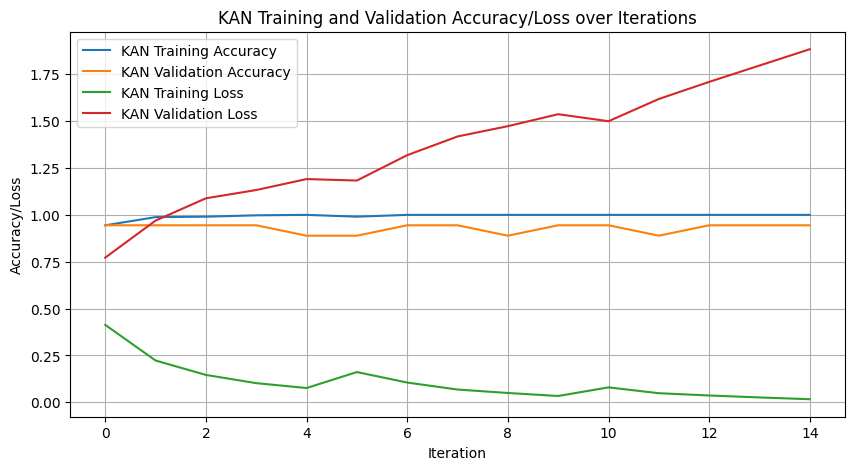

In [21]:
# Assuming you stored training accuracy and loss in results during KAN training
plt.figure(figsize=(10, 5))
plt.plot(results["train_acc"], label='KAN Training Accuracy')
plt.plot(results["test_acc"], label='KAN Validation Accuracy')
plt.plot(results["train_loss"], label='KAN Training Loss')
plt.plot(results["test_loss"], label='KAN Validation Loss')
plt.title('KAN Training and Validation Accuracy/Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Predictions
test_preds_kan = torch.argmax(model.forward(test_input).detach(), dim=1).numpy()
train_preds_kan = torch.argmax(model.forward(train_input).detach(), dim=1).numpy()

# Evaluate KAN model
from sklearn.metrics import classification_report
kan_train_acc = accuracy_score(train_label.numpy(), train_preds_kan)
kan_test_acc = accuracy_score(test_label.numpy(), test_preds_kan)
kan_report = classification_report(test_label.numpy(), test_preds_kan)

print("KAN Model Performance:")
print("Train ACC:", kan_train_acc)
print("Test ACC:", kan_test_acc)
print(kan_report)

KAN Model Performance:
Train ACC: 1.0
Test ACC: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.94      1.00      0.97        15

    accuracy                           0.94        18
   macro avg       0.97      0.83      0.88        18
weighted avg       0.95      0.94      0.94        18



In [23]:
test_preds_kan

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
# Plotting KAN network
# model.plot(scale=10)

In [25]:
# # Learning curve based on ACC and LOSS
# plt.figure(figsize=(10, 5))
# plt.plot(results["train_acc"], label='Training Accuracy')
# plt.plot(results["test_acc"], label='Val Accuracy')
# plt.plot(results["train_loss"], label='Training Loss')
# plt.plot(results["test_loss"], label='Val Loss')
# plt.title('Training and Val Accuracy over Iterations')
# plt.xlabel('Iteration')
# plt.ylabel('Accuracy & Loss')
# plt.legend()*-
# plt.grid(True)
# plt.show()

In [26]:
#from sklearn.metrics import classification_report
#print(classification_report(test_labels.numpy(), test_preds.numpy()))

Logistic-Regression Model

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn. impute import SimpleImputer
from sklearn.metrics import classification_report

# Split the data into train and test sets

from sklearn.linear_model import LogisticRegression
mdl_LR = LogisticRegression(max_iter=30000)
mdl_LR.fit(X_train, y_train)
y_pred_LR = mdl_LR.predict(X_test)
#print(classification_report(y_test, y_pred_LR))

lr_train_acc = mdl_LR.score(X_train, y_train)
lr_test_acc = mdl_LR.score(X_test, y_test)
lr_report = classification_report(y_test, y_pred_LR)

print("Logistic Regression Model Performance:")
print("Train ACC:", lr_train_acc)
print("Test ACC:", lr_test_acc)
print(lr_report)

Logistic Regression Model Performance:
Train ACC: 0.7215496368038741
Test ACC: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.93      0.93      0.93        15

    accuracy                           0.89        18
   macro avg       0.80      0.80      0.80        18
weighted avg       0.89      0.89      0.89        18



GCB-Model

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report


from sklearn.ensemble import  GradientBoostingClassifier
# Gradient Boosting Classifier
gbc_clf = GradientBoostingClassifier()
import pandas as pd

gbc_clf.fit(X_train, y_train)
y_pred_gbc=gbc_clf.predict(X_test)
gbc_clf.score(X_test, y_test) * 100
#print("Classification report: \n", classification_report(y_test, y_pred))

gbc_train_acc = gbc_clf.score(X_train, y_train)
gbc_test_acc = gbc_clf.score(X_test, y_test)
gbc_report = classification_report(y_test, y_pred_gbc)

print("Gradient Boosting Classifier Model Performance:")
print("Train ACC:", gbc_train_acc)
print("Test ACC:", gbc_test_acc)
print(gbc_report)

Gradient Boosting Classifier Model Performance:
Train ACC: 0.9782082324455206
Test ACC: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.93      0.93      0.93        15

    accuracy                           0.89        18
   macro avg       0.80      0.80      0.80        18
weighted avg       0.89      0.89      0.89        18



XGBoost-model

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import  classification_report, balanced_accuracy_score


# Create a pipeline for scaling and XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(eval_metric='logloss'))
])

# Define the grid of parameters to search over
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Select the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_xgb = best_model.predict(X_test)

# Print the classification report
#print("Classification report: \n", classification_report(y_test, y_pred))

xgb_train_acc = best_model.score(X_train, y_train)
xgb_test_acc = best_model.score(X_test, y_test)
xgb_report = classification_report(y_test, y_pred_xgb)

print("XGBoost Model Performance:")
print("Train ACC:", xgb_train_acc)
print("Test ACC:", xgb_test_acc)
print(xgb_report)


Best parameters:  {'xgb__learning_rate': 0.2, 'xgb__n_estimators': 50}
Best score:  0.8061710255656773
XGBoost Model Performance:
Train ACC: 1.0
Test ACC: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.87      0.87      0.87        15

    accuracy                           0.78        18
   macro avg       0.60      0.60      0.60        18
weighted avg       0.78      0.78      0.78        18



Verification and Validation

In [30]:

# Summarize and Compare the Results
print("\n--- Comparison Summary ---")
print(f"{'Model':<30} {'Train Accuracy':<15} {'Test Accuracy':<15}")
print(f"{'KAN Model':<30} {kan_train_acc:<15.4f} {kan_test_acc:<15.4f}")
print(f"{'Logistic Regression':<30} {lr_train_acc:<15.4f} {lr_test_acc:<15.4f}")
print(f"{'Gradient Boosting Classifier':<30} {gbc_train_acc:<15.4f} {gbc_test_acc:<15.4f}")
print(f"{'XGBoost':<30} {xgb_train_acc:<15.4f} {xgb_test_acc:<15.4f}")



--- Comparison Summary ---
Model                          Train Accuracy  Test Accuracy  
KAN Model                      1.0000          0.9444         
Logistic Regression            0.7215          0.8889         
Gradient Boosting Classifier   0.9782          0.8889         
XGBoost                        1.0000          0.7778         


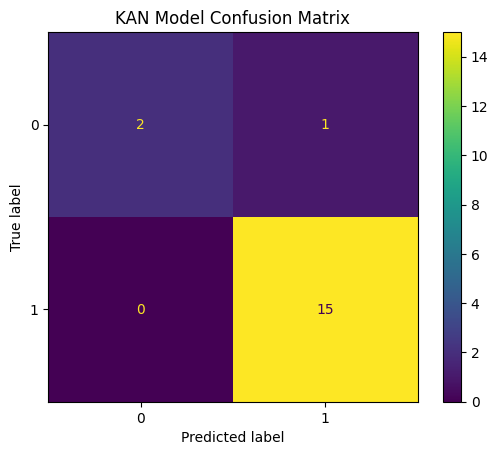

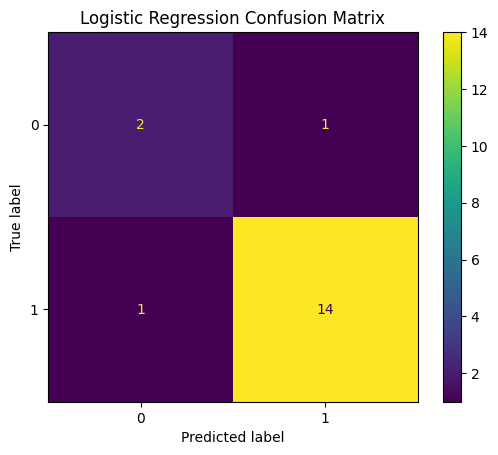

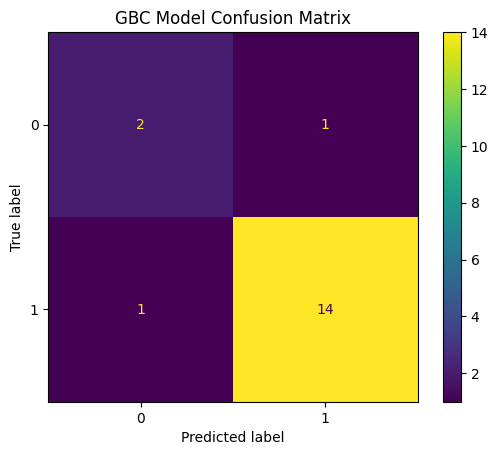

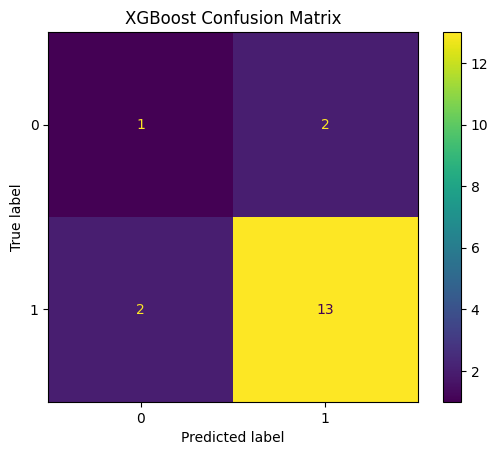

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for KAN Model
cm_kan = confusion_matrix(test_label.numpy(), test_preds_kan)
disp_kan = ConfusionMatrixDisplay(confusion_matrix=cm_kan)
disp_kan.plot()
plt.title("KAN Model Confusion Matrix")
plt.show()

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_LR)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Confusion Matrix for GBC Model
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc)
disp_gbc.plot()
plt.title("GBC Model Confusion Matrix")
plt.show()

# Confusion Matrix for XGBoost Model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()
plt.title("XGBoost Confusion Matrix")
plt.show()


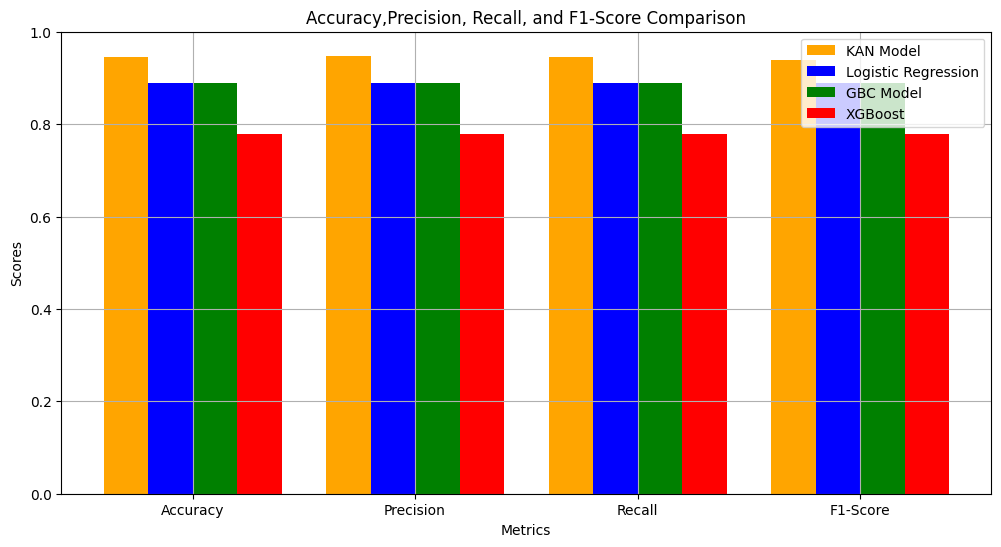

In [32]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Get precision, recall, and F1-score for each model
precision_kan, recall_kan, f1_kan, _ = precision_recall_fscore_support(test_labels, test_preds_kan, average='weighted')
precision_lr, recall_lr, f1_lr, _ = precision_recall_fscore_support(y_test, y_pred_LR, average='weighted')
precision_gbc, recall_gbc, f1_gbc, _ = precision_recall_fscore_support(y_test, y_pred_gbc, average='weighted')
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average='weighted')

# Calculate accuracy for each model
accuracy_kan = accuracy_score(test_labels, test_preds_kan)
accuracy_lr = accuracy_score(y_test, y_pred_LR)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Data to plot (include accuracy)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
kan_scores = [accuracy_kan, precision_kan, recall_kan, f1_kan]
lr_scores = [accuracy_lr, precision_lr, recall_lr, f1_lr]
gbc_scores = [accuracy_gbc, precision_gbc, recall_gbc, f1_gbc]
xgb_scores = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]
# Creating the bar plot for each metric
x = np.arange(len(metrics))
width = 0.2  # width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, kan_scores, width, label='KAN Model', color='orange')
plt.bar(x - 0.5*width, lr_scores, width, label='Logistic Regression', color='blue')
plt.bar(x + 0.5*width, gbc_scores, width, label='GBC Model', color='green')
plt.bar(x + 1.5*width, xgb_scores, width, label='XGBoost', color='red')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Accuracy,Precision, Recall, and F1-Score Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()



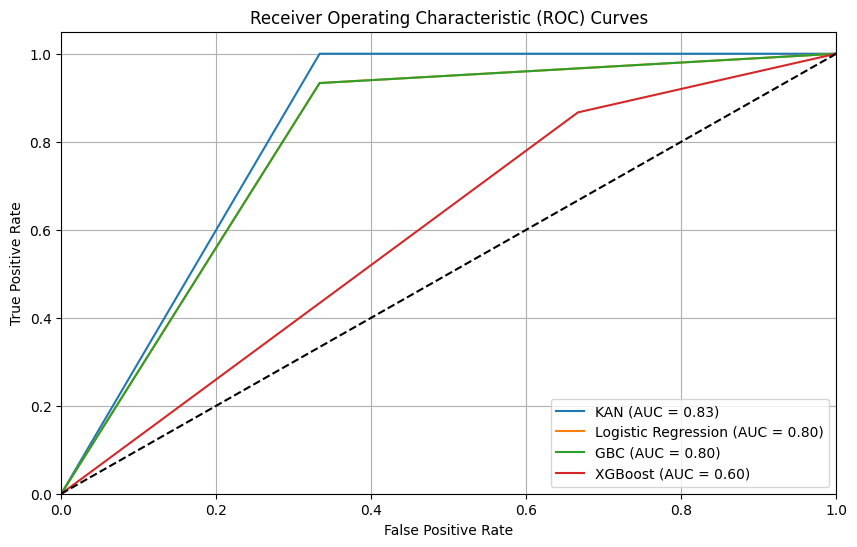

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have the true labels (test_label.numpy()) and predicted probabilities for each model:
# - test_preds_kan: Predictions from KAN model
# - y_pred_LR: Predictions from Logistic Regression
# - y_pred_gbc: Predictions from Gradient Boosting Classifier
# - y_pred_xgb: Predictions from XGBoost

# Calculate ROC curves and AUC scores for each model
fpr_kan, tpr_kan, _ = roc_curve(test_label.numpy(), test_preds_kan)
auc_kan = roc_auc_score(test_label.numpy(), test_preds_kan)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_LR)
auc_lr = roc_auc_score(y_test, y_pred_LR)

fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_gbc)
auc_gbc = roc_auc_score(y_test, y_pred_gbc)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_kan, tpr_kan, label='KAN (AUC = %0.2f)' % auc_kan)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_gbc, tpr_gbc, label='GBC (AUC = %0.2f)' % auc_gbc)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc_xgb)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

| train_loss: 3.46e-03 | test_loss: 1.91e+00 | reg: 1.24e+03 | : 100%|█| 15/15 [01:28<00:00,  5.93s/


saving model version 0.2


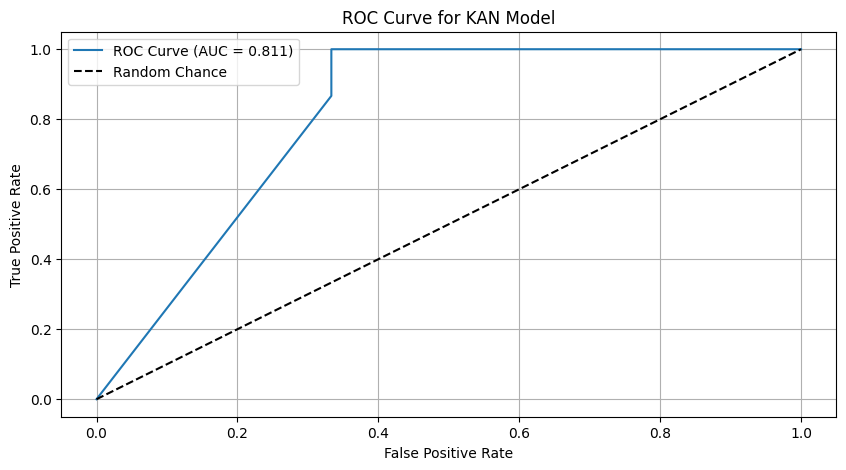

Training Time: 89.1610
Inference Time: 4.3161
Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1 Score: 1.0000
Test Accuracy: 0.9444
Test Precision: 0.9375
Test Recall: 1.0000
Test F1 Score: 0.9677
Test AUC-ROC: 0.8111


In [34]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from time import time
import matplotlib.pyplot as plt

# Function to evaluate KAN model
def evaluate_kan_model(model, dataset):
    metrics = {}
    
    # Unpack dataset
    train_input = dataset['train_input']
    train_label = dataset['train_label']
    test_input = dataset['test_input']
    test_label = dataset['test_label']
    
    # Training time
    start_train = time()
    model.fit(
        {'train_input': train_input, 'train_label': train_label, 
         'test_input': dataset['val_input'], 'test_label': dataset['val_label']},
        metrics=None,  # Training metrics handled internally
        opt="LBFGS",
        steps=15,
        loss_fn=torch.nn.CrossEntropyLoss()
    )
    end_train = time()
    metrics["Training Time"] = end_train - start_train
    
    # Predictions
    start_infer = time()
    train_preds = torch.argmax(model(train_input).detach(), dim=1).numpy()
    test_preds = torch.argmax(model(test_input).detach(), dim=1).numpy()
    end_infer = time()
    metrics["Inference Time"] = end_infer - start_infer

    # Metrics on train data
    train_true = train_label.numpy()
    metrics["Train Accuracy"] = accuracy_score(train_true, train_preds)
    metrics["Train Precision"] = precision_score(train_true, train_preds)
    metrics["Train Recall"] = recall_score(train_true, train_preds)
    metrics["Train F1 Score"] = f1_score(train_true, train_preds)
    
    # Metrics on test data
    test_true = test_label.numpy()
    metrics["Test Accuracy"] = accuracy_score(test_true, test_preds)
    metrics["Test Precision"] = precision_score(test_true, test_preds)
    metrics["Test Recall"] = recall_score(test_true, test_preds)
    metrics["Test F1 Score"] = f1_score(test_true, test_preds)
    
    # AUC-ROC
    if hasattr(model, "forward"):
        test_proba = torch.nn.functional.softmax(model(test_input).detach(), dim=1).numpy()[:, 1]
        metrics["Test AUC-ROC"] = roc_auc_score(test_true, test_proba)
        
        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(test_true, test_proba)
        plt.figure(figsize=(10, 5))
        plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.3f})".format(metrics["Test AUC-ROC"]))
        plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
        plt.title("ROC Curve for KAN Model")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        metrics["Test AUC-ROC"] = "Not Available (Model does not support probabilities)"
    
    return metrics

# Example usage with KAN
kan_metrics = evaluate_kan_model(model, dataset)

# Print metrics
for metric, value in kan_metrics.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}: {value}")


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from time import time
import matplotlib.pyplot as plt

# Function to evaluate a Scikit-learn-like model (including XGBoost and GCB)
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    metrics = {}
    
    # Training time
    start_train = time()
    model.fit(X_train, y_train)
    end_train = time()
    metrics["Training Time"] = end_train - start_train
    
    # Predictions
    start_infer = time()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    end_infer = time()
    metrics["Inference Time"] = end_infer - start_infer

    # Metrics on train data
    metrics["Train Accuracy"] = accuracy_score(y_train, y_train_pred)
    metrics["Train Precision"] = precision_score(y_train, y_train_pred)
    metrics["Train Recall"] = recall_score(y_train, y_train_pred)
    metrics["Train F1 Score"] = f1_score(y_train, y_train_pred)
    
    # Metrics on test data
    metrics["Test Accuracy"] = accuracy_score(y_test, y_test_pred)
    metrics["Test Precision"] = precision_score(y_test, y_test_pred)
    metrics["Test Recall"] = recall_score(y_test, y_test_pred)
    metrics["Test F1 Score"] = f1_score(y_test, y_test_pred)
    
    # AUC-ROC
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    if y_test_proba is not None:
        metrics["Test AUC-ROC"] = roc_auc_score(y_test, y_test_proba)
        
        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_test_proba)
        plt.figure(figsize=(10, 5))
        plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.3f})".format(metrics["Test AUC-ROC"]))
        plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
        plt.title(f"ROC Curve for {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        metrics["Test AUC-ROC"] = "Not Available (Model does not support probabilities)"
    
    return metrics


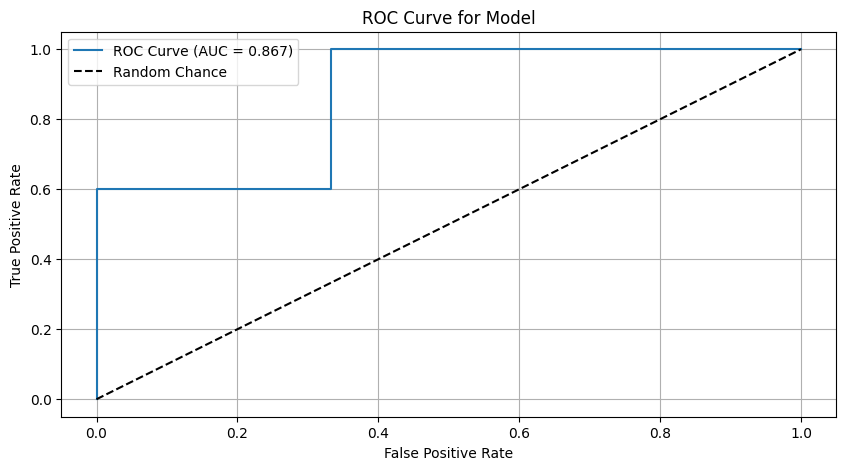

Training Time: 0.0040
Inference Time: 0.0014
Train Accuracy: 0.7215
Train Precision: 0.7736
Train Recall: 0.8267
Train F1 Score: 0.7993
Test Accuracy: 0.8889
Test Precision: 0.9333
Test Recall: 0.9333
Test F1 Score: 0.9333
Test AUC-ROC: 0.8667


In [38]:
# Example usage with Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
lr_model = LogisticRegression(max_iter=3000)

# Evaluate the logistic regression model
lr_metrics = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

# Print the metrics
for metric, value in lr_metrics.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}: {value}")

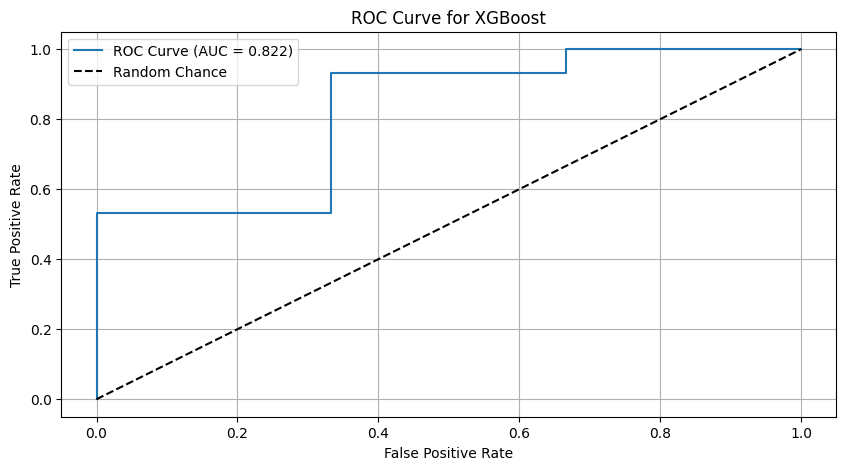

XGBoost Model Performance:
Training Time: 0.0431
Inference Time: 0.0040
Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1 Score: 1.0000
Test Accuracy: 0.8889
Test Precision: 0.9333
Test Recall: 0.9333
Test F1 Score: 0.9333
Test AUC-ROC: 0.8222


In [43]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', n_estimators=100, learning_rate=0.1)

# Evaluate XGBoost
xgb_metrics = evaluate_model(xgb_model, X_train, y_train, X_test, y_test, model_name="XGBoost")

# Print XGBoost metrics
print("XGBoost Model Performance:")
for metric, value in xgb_metrics.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}: {value}")


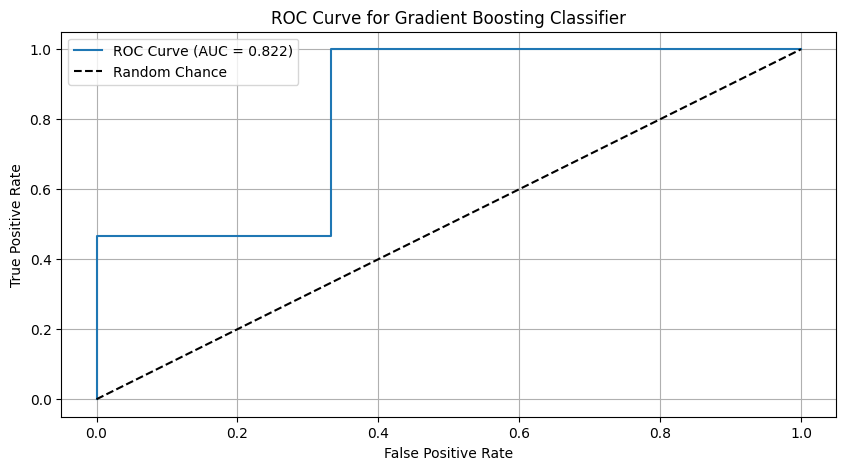


Gradient Boosting Classifier Model Performance:
Training Time: 0.1059
Inference Time: 0.0026
Train Accuracy: 0.9782
Train Precision: 0.9685
Train Recall: 1.0000
Train F1 Score: 0.9840
Test Accuracy: 0.8889
Test Precision: 0.9333
Test Recall: 0.9333
Test F1 Score: 0.9333
Test AUC-ROC: 0.8222


In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GCB model
gcb_model = GradientBoostingClassifier()

# Evaluate GCB
gcb_metrics = evaluate_model(gcb_model, X_train, y_train, X_test, y_test, model_name="Gradient Boosting Classifier")

# Print GCB metrics
print("\nGradient Boosting Classifier Model Performance:")
for metric, value in gcb_metrics.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}: {value}")


Evaluating Support Vector Machine (SVM)...


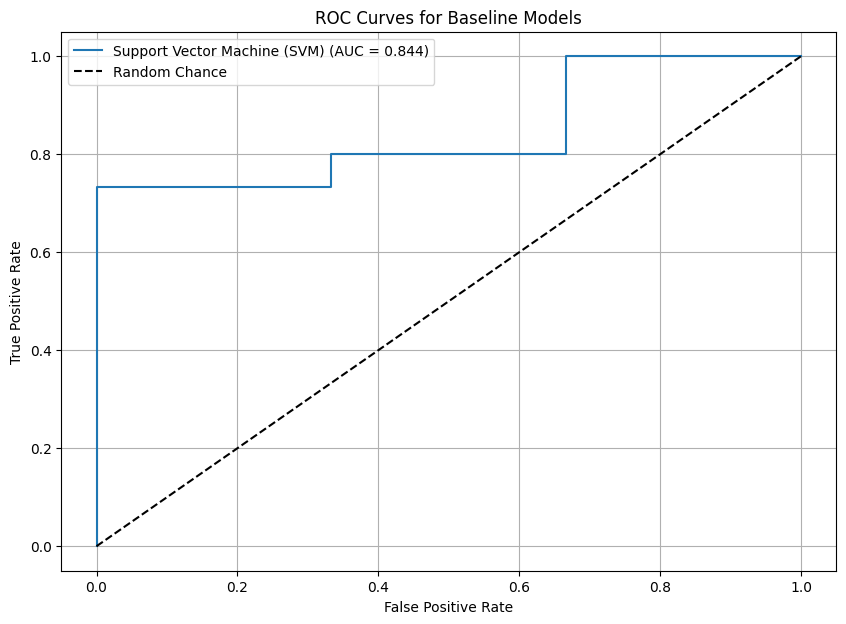


Support Vector Machine (SVM) Performance:
Training Time: 0.0206
Inference Time: 0.0085
Train Accuracy: 0.7458
Train Precision: 0.8007
Train Recall: 0.8267
Train F1 Score: 0.8135
Test Accuracy: 0.7778
Test Precision: 0.8667
Test Recall: 0.8667
Test F1 Score: 0.8667
Test AUC-ROC: 0.8444


In [45]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from time import time

# Function to evaluate and compare models
def benchmark_models(models, X_train, y_train, X_test, y_test):
    results = {}
    plt.figure(figsize=(10, 7))
    
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        metrics = {}

        # Training
        start_train = time()
        model.fit(X_train, y_train)
        end_train = time()
        metrics["Training Time"] = end_train - start_train

        # Inference
        start_infer = time()
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        end_infer = time()
        metrics["Inference Time"] = end_infer - start_infer

        # Compute metrics
        metrics["Train Accuracy"] = accuracy_score(y_train, y_train_pred)
        metrics["Train Precision"] = precision_score(y_train, y_train_pred)
        metrics["Train Recall"] = recall_score(y_train, y_train_pred)
        metrics["Train F1 Score"] = f1_score(y_train, y_train_pred)

        metrics["Test Accuracy"] = accuracy_score(y_test, y_test_pred)
        metrics["Test Precision"] = precision_score(y_test, y_test_pred)
        metrics["Test Recall"] = recall_score(y_test, y_test_pred)
        metrics["Test F1 Score"] = f1_score(y_test, y_test_pred)

        # AUC-ROC
        y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_proba is not None:
            metrics["Test AUC-ROC"] = roc_auc_score(y_test, y_test_proba)

            # Plot ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_test_proba)
            plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics['Test AUC-ROC']:.3f})")
        else:
            metrics["Test AUC-ROC"] = "N/A"

        results[model_name] = metrics

    # Plot random chance line and finalize ROC curve
    plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
    plt.title("ROC Curves for Baseline Models")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

# Define baseline models
baseline_models = {
    "Support Vector Machine (SVM)": SVC(probability=True)
}

# Evaluate all baseline models
baseline_results = benchmark_models(baseline_models, X_train, y_train, X_test, y_test)

# Print results
for model_name, metrics in baseline_results.items():
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}: {value}")


In [56]:
from graphviz import Digraph

# Function to create a visually enhanced pipeline graph
def create_full_pipeline():
    pipeline_graph = Digraph("FullPipelineVisualization", format="png")
    pipeline_graph.attr(rankdir="TB", size="15,12", fontsize="14")
    
    # Define styles for nodes
    common_style = {"shape": "rectangle", "style": "rounded, filled", "fillcolor": "lightblue", "fontsize": "12"}
    preprocessing_style = {"shape": "rectangle", "style": "filled", "fillcolor": "lightyellow", "fontsize": "12"}
    model_style = {"shape": "ellipse", "style": "filled", "fillcolor": "orange", "fontsize": "12"}
    evaluation_style = {"shape": "diamond", "style": "filled", "fillcolor": "lightgreen", "fontsize": "12"}
    
    # Preprocessing Steps
    pipeline_graph.node("Data Loading", "Load Dataset\n(.csv, .json, .xlsx)", **common_style)
    pipeline_graph.node("Handle Missing Data", "Handle Missing Data\n(Mean/Median Imputation, Drop NaN)", **preprocessing_style)
    pipeline_graph.node("Outlier Detection", "Outlier Detection\n(Z-Score, IQR Method)", **preprocessing_style)
    pipeline_graph.node("Feature Engineering", "Feature Engineering\n(Create New Features, Transformations)", **preprocessing_style)
    pipeline_graph.node("Feature Selection", "Feature Selection\n(Recursive Feature Elimination, Feature Importance)", **preprocessing_style)
    pipeline_graph.node("Data Splitting", "Split Data\n(Train, Validation, Test)", **preprocessing_style)
    
    # Models
    pipeline_graph.node("KAN Model", "KAN Model\n(Hyperparameters: width, grid, k)", **model_style)
    pipeline_graph.node("Logistic Regression", "Logistic Regression\n(Hyperparameter: max_iter)", **model_style)
    pipeline_graph.node("Gradient Boosting", "Gradient Boosting Classifier\n(Default Parameters)", **model_style)
    pipeline_graph.node("XGBoost", "XGBoost Classifier\n(GridSearch for Parameters)", **model_style)
    
    # Hyperparameter Tuning
    pipeline_graph.node("Hyperparameter Tuning", "Hyperparameter Tuning\n(GridSearchCV, RandomizedSearchCV)", **model_style)
    
    # Evaluation
    pipeline_graph.node("Evaluation", "Evaluation\n(Accuracy, Precision, Recall, F1-Score)", **evaluation_style)
    pipeline_graph.node("Confusion Matrix", "Confusion Matrix\n(True Positives, False Positives, etc.)", **evaluation_style)
    pipeline_graph.node("ROC Curve", "ROC Curve\n(AUC-ROC for Binary Classification)", **evaluation_style)
    
    # Connections for Preprocessing
    pipeline_graph.edge("Data Loading", "Handle Missing Data", label="Clean Data")
    pipeline_graph.edge("Handle Missing Data", "Outlier Detection", label="Detect Anomalies")
    pipeline_graph.edge("Outlier Detection", "Feature Engineering", label="Transform Data")
    pipeline_graph.edge("Feature Engineering", "Feature Selection", label="Select Features")
    pipeline_graph.edge("Feature Selection", "Data Splitting", label="Prepare for Modeling")
    
    # Connections for Models
    pipeline_graph.edge("Data Splitting", "KAN Model", label="Train Data")
    pipeline_graph.edge("Data Splitting", "Logistic Regression", label="Train Data")
    pipeline_graph.edge("Data Splitting", "Gradient Boosting", label="Train Data")
    pipeline_graph.edge("Data Splitting", "XGBoost", label="Train Data")
    
    # Connections for Hyperparameter Tuning
    pipeline_graph.edge("KAN Model", "Hyperparameter Tuning", label="Tune Parameters")
    pipeline_graph.edge("Logistic Regression", "Hyperparameter Tuning", label="Tune Parameters")
    pipeline_graph.edge("Gradient Boosting", "Hyperparameter Tuning", label="Tune Parameters")
    pipeline_graph.edge("XGBoost", "Hyperparameter Tuning", label="Tune Parameters")
    
    # Connections for Evaluation
    pipeline_graph.edge("Hyperparameter Tuning", "Evaluation", label="Evaluate Model")
    pipeline_graph.edge("Evaluation", "Confusion Matrix", label="Analyze Results")
    pipeline_graph.edge("Evaluation", "ROC Curve", label="Measure ROC")
    
    # Render the graph to a file
    pipeline_graph.render("full_pipeline_enhanced", format="png", view=True)

# Call the function to create the pipeline
create_full_pipeline()


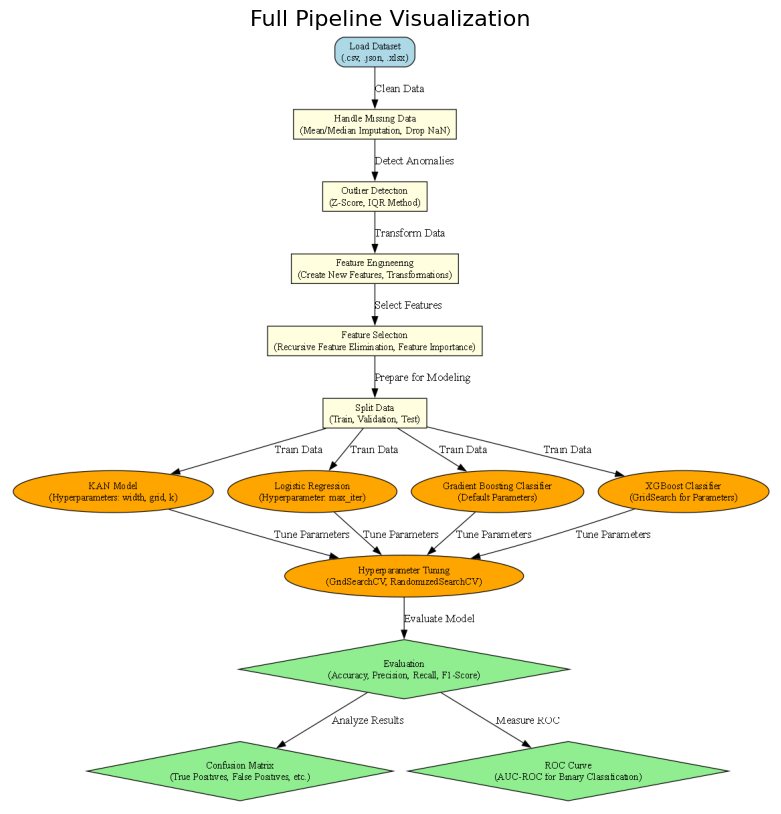

In [57]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the generated pipeline image
image_path = "full_pipeline_enhanced.png"

# Load and display the image
try:
    # Load the image using PIL
    img = Image.open(image_path)
    
    # Display the image using matplotlib for better control
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")  # Hide axes for better visualization
    plt.title("Full Pipeline Visualization", fontsize=16)
    plt.show()
except FileNotFoundError:
    print(f"Error: The file '{image_path}' was not found. Please ensure the pipeline was rendered successfully.")
